<div style="text-align:center;"> <h2> Tracé de vecteurs vitesses en Python</h2></div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Méthode de dérivée à droite dans le programme suivant

 gmoyen = 9.448721402965605 m.s^-2
 écart-type = 1.3412555613001842 m.s^-2


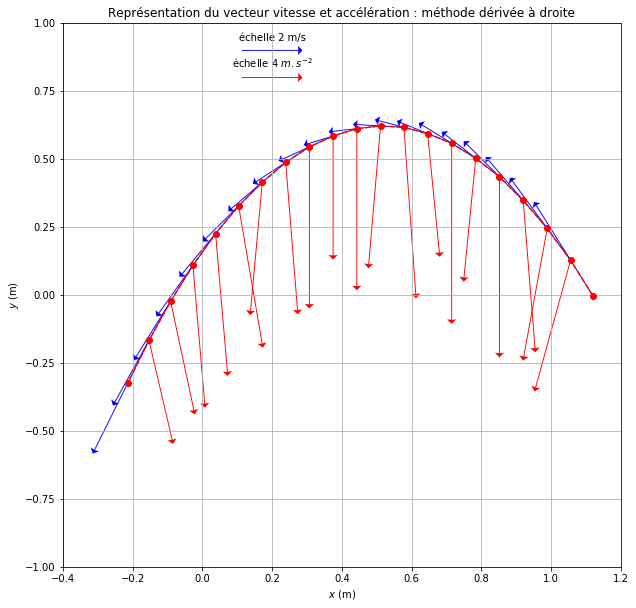

In [2]:
#données pointage
xp=[1.120,1.056,0.989,0.920,0.852,0.784,0.715,0.646,0.578,0.511,0.443,0.375,0.307,0.239,0.172,0.104,0.038,-0.027,-0.091,-0.153,-0.213]
yp=[-0.003,0.128,0.245,0.348,0.435,0.503,0.558,0.594,0.617,0.622,0.612,0.585,0.545,0.488,0.415,0.328,0.226,0.109,-0.023,-0.167,-0.322]
tp=[0.000,0.040,0.080,0.120,0.160,0.200,0.240,0.280,0.320,0.360,0.400,0.440,0.480,0.520,0.560,0.600,0.640,0.680,0.720,0.760,0.800]

#données retenues pour le tracé
intpts=1
xt=[]
yt=[]
tt=[]

for i in range (0,len(xp),intpts):
  xt.append(xp[i])  
  yt.append(yp[i])
  tt.append(tp[i])


#Calcul des coordonnées Vx 
Vx=[]
for i in range(len(xt)-1) :
    Vxi=(xt[i+1]-xt[i])/(tt[i+1]-tt[i])
    Vx.append(Vxi)

#Calcul des coordonnées Vy 
Vy=[]
for i in range(len(yt)-1) :
    Vyi=(yt[i+1]-yt[i])/(tt[i+1]-tt[i])
    Vy.append(Vyi)


#préparation de la zone graphique
plt.figure(figsize=(10,10))
plt.title("Représentation du vecteur vitesse et accélération : méthode dérivée à droite")

plt.xlim(-0.4,1.2) 
plt.ylim(-1,1)
plt.grid()

plt.xlabel('$x$ (m)')
plt.ylabel('$y$ (m)')
#tracé des points de la trajectoire
plt.plot(xt,yt,'ro--')
normeV=[]
normeA=[]
#tracé des vecteurs vitesse avec un facteur d'échelle
for i in range(len(Vx)):
    vecteurV=plt.quiver(xt[i],yt[i],Vx[i]/10,Vy[i]/10,width=0.003,headwidth=10,scale=1,color='b',angles='xy', units='xy')
    normeV.append((Vx[i]**2+Vy[i]**2)**0.5)
for i in range(1,len(Vx)):    
    vecteurA=plt.quiver(xt[i],yt[i],((Vx[i]-Vx[i-1])/(tt[i]-tt[i-1]))/20,((Vy[i]-Vy[i-1])/(tt[i]-tt[i-1]))/20,width=0.003,headwidth=10,scale=1,color='r',angles='xy', units='xy')
    normeA.append((((Vx[i]-Vx[i-1])/(tt[i]-tt[i-1]))**2+((Vy[i]-Vy[i-1])/(tt[i]-tt[i-1]))**2)**0.5)
#Légendes
plt.quiverkey(vecteurA, 0.2, 0.8, 0.2,label='échelle 4 $m.s^{-2}$',coordinates='data')
plt.quiverkey(vecteurV, 0.2, 0.9, 0.2,label='échelle 2 m/s',coordinates='data')

print(" gmoyen =",np.mean(np.array(normeA)), "m.s^-2")
print(" écart-type =",np.std(np.array(normeA)),"m.s^-2")
plt.show()

Méthode de dérivée centrée

 gmoyen = 9.600490850746224 m.s^-2
 écart-type = 0.5950863924203866 m.s^-2


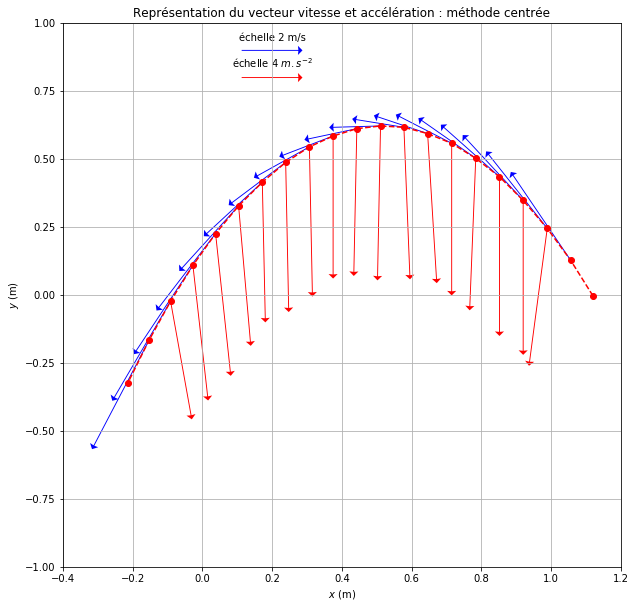

In [3]:
#données pointage
xp=[1.120,1.056,0.989,0.920,0.852,0.784,0.715,0.646,0.578,0.511,0.443,0.375,0.307,0.239,0.172,0.104,0.038,-0.027,-0.091,-0.153,-0.213]
yp=[-0.003,0.128,0.245,0.348,0.435,0.503,0.558,0.594,0.617,0.622,0.612,0.585,0.545,0.488,0.415,0.328,0.226,0.109,-0.023,-0.167,-0.322]
tp=[0.000,0.040,0.080,0.120,0.160,0.200,0.240,0.280,0.320,0.360,0.400,0.440,0.480,0.520,0.560,0.600,0.640,0.680,0.720,0.760,0.800]

#données retenues pour le tracé
intpts=1
xt=[]
yt=[]
tt=[]

for i in range (0,len(xp),intpts):
  xt.append(xp[i])  
  yt.append(yp[i])
  tt.append(tp[i])


#Calcul des coordonnées Vx 
Vx=[]
for i in range(1,len(xt)-1) :
    Vxi=(xt[i+1]-xt[i-1])/(tt[i+1]-tt[i-1])
    Vx.append(Vxi)

#Calcul des coordonnées Vy 
Vy=[]
for i in range(1,len(yt)-1) :
    Vyi=(yt[i+1]-yt[i-1])/(tt[i+1]-tt[i-1])
    Vy.append(Vyi)

#préparation de la zone graphique
plt.figure(figsize=(10,10))
plt.title("Représentation du vecteur vitesse et accélération : méthode centrée")

plt.xlim(-0.4,1.2) 
plt.ylim(-1,1)
plt.grid()

plt.xlabel('$x$ (m)')
plt.ylabel('$y$ (m)')
#tracé des points de la trajectoire
plt.plot(xt,yt,'ro--')
#tracé des vecteurs vitesse avec un facteur d'échelle
normeV=[]
normeA=[]
for i in range(len(Vx)):
    vecteurV=plt.quiver(xt[i+1],yt[i+1],Vx[i]/10,Vy[i]/10,width=0.003,headwidth=10,scale=1,color='b',angles='xy', units='xy')
    normeV.append((Vx[i]**2+Vy[i]**2)**0.5)
for i in range(len(Vx)-2):    
    vecteurA=plt.quiver(xt[i+2],yt[i+2],((Vx[i+2]-Vx[i])/(tt[i+2]-tt[i]))/20,((Vy[i+2]-Vy[i])/(tt[i+2]-tt[i]))/20,width=0.003,headwidth=10,scale=1,color='r',angles='xy', units='xy')
    normeA.append((((Vx[i+2]-Vx[i])/(tt[i+2]-tt[i]))**2+((Vy[i+2]-Vy[i])/(tt[i+2]-tt[i]))**2)**0.5)
    
#Légende
plt.quiverkey(vecteurA, 0.2, 0.8, 0.2,label='échelle 4 $m.s^{-2}$',coordinates='data')
plt.quiverkey(vecteurV, 0.2, 0.9, 0.2,label='échelle 2 m/s',coordinates='data')

print(" gmoyen =",np.mean(np.array(normeA)), "m.s^-2")
print(" écart-type =",np.std(np.array(normeA)),"m.s^-2")
plt.show()